In [1]:
# Library Statements

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Clustering Antartic Penguin Species

### Data Validation

Nine Penguins are missing sex info and two of these are missing all info. We drop these penguins and encode the categorical variable, Sex, with 1 meaning female and 0 meaning male.

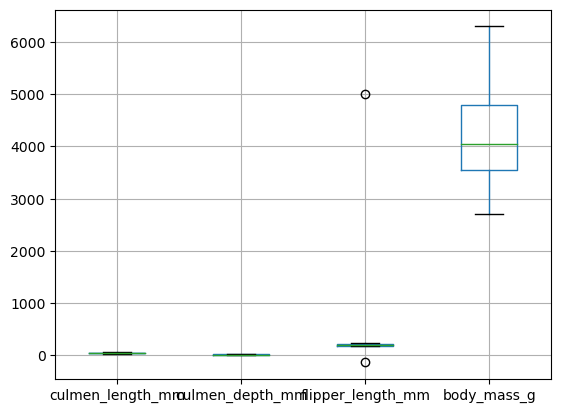

In [15]:
penguins_df = pd.read_csv('datasets/penguins.csv') # 344 x 5

# print(penguins[penguins.isnull().any(axis=1)])

penguins_clean = penguins_df.dropna()
penguins_clean.boxplot()  
plt.show()

Visualized in the boxplot above, we see two outliers, both with flipper length. These outliers are above 4000 or negative.

We will remove these outliers.

In [16]:
penguins_clean = penguins_clean[(penguins_clean["flipper_length_mm"] < 4000) & 
                                (penguins_clean["flipper_length_mm"] > 0)]
# print(penguins_clean)

### Scaling and Encoding

We use standard scaling to make the data mean 0 with variance 1.

In [17]:
penguins_preprocessed = pd.get_dummies(penguins_clean, columns = ['sex'], dtype = 'int').drop(columns = ['sex_.', 'sex_MALE'])

# print(penguins_preprocessed)

scaler = StandardScaler()

penguins_preprocessed = scaler.fit_transform(penguins_preprocessed)

# print(penguins_preprocessed)

In [5]:
# penguins_clean['sex'] = np.where(penguins_clean['sex'] == 'MALE', 0, 1)
# print(penguins_clean[numeric_columns])

### PCA

We perform PCA to reduce the dimensionality of this dataset to two dimensions. This will allow for visualization of clusters later.

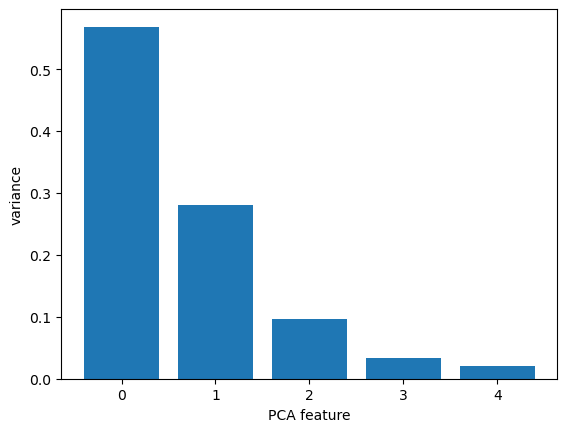

In [6]:
pca = PCA()
pca.fit(penguins_preprocessed)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# The explained variance is negligible after the 2nd component so we will perform PCA with 2 components 
n_components = 2

penguins_PCA = PCA(n_components = n_components).fit(penguins_preprocessed)

penguins_PCA_data = penguins_PCA.transform(penguins_preprocessed)

### K means

We will use K means to determine the optimal number of clusters that will best divide the data. This is evaluated in terms of inertia, or the average distance between cluster centers and the points within that cluster.

An elbow in the plot is a good choice for the number of clusters since the addition of this cluster is significant but considering another cluster does not significantly reduce inertia.
- The elbow in the plot below is at 3 clusters

D:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

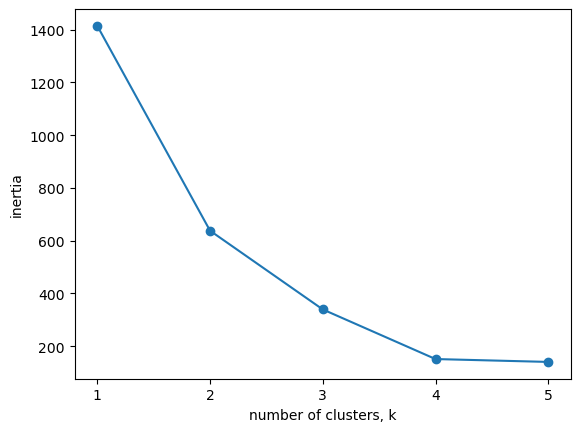

D:\Python\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k, n_init='auto', random_state = 42)
    
    # Fit model to samples
    model.fit(penguins_PCA_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Create a KMeans instance with 3 clusters: model
n_cluster = 3
kmeans = KMeans(n_clusters = n_cluster, n_init='auto')

# Fit model to points
kmeans.fit(penguins_PCA_data)

# Determine the cluster labels of new_points: labels
# y_pred = model.predict(X_test)

# Print cluster labels of new_points
# print(y_pred)

### Conclusion

Now, we extract our predictions from our model and see how we did.

In [14]:
label = kmeans.labels_
penguins_clean['label'] = label

print(penguins_clean.drop(columns = 'sex').groupby('label').mean())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             39.953333        17.599048         189.038095  3413.095238
1             47.542500        15.002500         217.233333  5090.625000
2             44.067593        19.095370         194.666667  4001.620370


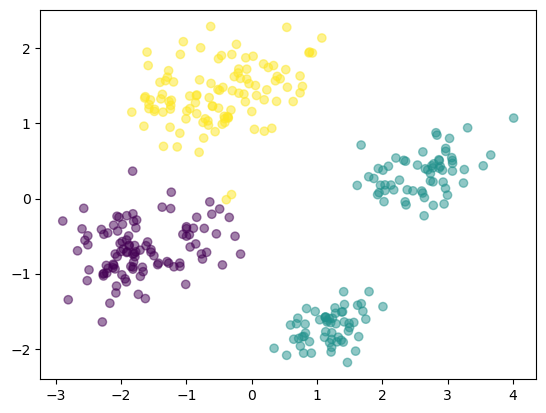

In [23]:
PCA_df = pd.DataFrame(data = penguins_PCA_data)
PCA_df['label'] = label

plt.scatter(PCA_df[0], PCA_df[1], c=PCA_df['label'], alpha=0.5)
plt.show()

The above visualization demonstrates the resulting grouping. Note that the axes are arbitrary.

One cluster is cleanly divided into two subclusters, sugesting that there may be significant gender variation in this species or a fourth species that was not considered.